# Time Series Analysis of Agricultural Data

This notebook presents a comprehensive analysis of the responsiveness of four key output variables: normalized Crop Water Stress Index (CWSI), Soil Water Stress Index (SWSI), Heat Index, and Daily Evapotranspiration (Daily_ET) to various environmental input variables over the season for each plot number. The analysis includes Time Series Decomposition, Correlation Analysis, Lag Analysis, Simple Linear Regression with Time Lags, and Variance and Standard Deviation Analysis.


## Setup and Data Loading

First, we load the necessary libraries and the dataset for our analysis.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

# Load dataset
file_path = 'processed_data.csv'
df = pd.read_csv(file_path, parse_dates=['TIMESTAMP'], index_col='TIMESTAMP')

# Filter df for plot_number 2001
df = df[df['plot_number'] == 2001]

# remove all CWSI values above 1.5
df = df[df['CWSI'] < 1.5]


# do df.describe() for canopy_temp, SWSI, CWSI, heat_index, and daily_et
selected_columns = ['canopy_temp', 'SWSI', 'CWSI', 'HeatIndex_2m_Avg', 'daily_et']
df[selected_columns].describe()

# normalize HeatIndex_2m_Avg and canopy_temp


,canopy_temp,SWSI,CWSI,HeatIndex_2m_Avg,daily_et
count,791.000000,807.000000,835.000000,835.000000,835.000000
mean,19.683544,0.712667,0.520162,21.076818,2.007541
std,6.838519,0.296201,0.271200,7.795895,0.702281
min,1.485250,0.088333,0.000000,0.932383,0.529821
25%,15.865000,0.528750,0.269962,16.719250,1.478190
50%,20.165000,0.717500,0.555138,21.360500,2.078423
75%,25.032500,0.945625,0.685665,25.841167,2.377290
max,32.522500,1.245000,1.082233,39.955667,3.544858


## Plotting each column's distribution




c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bnsoh2\AppData\Local\Temp\ipykernel_27816\661199368.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


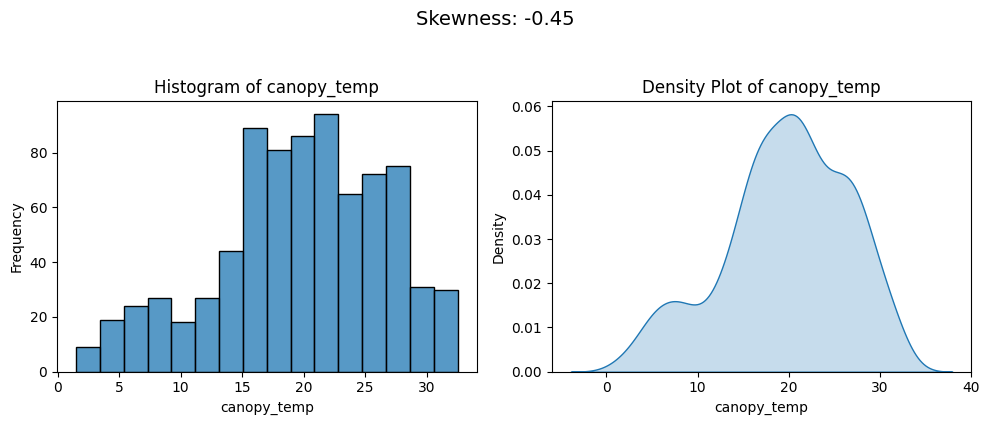

c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bnsoh2\AppData\Local\Temp\ipykernel_27816\661199368.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


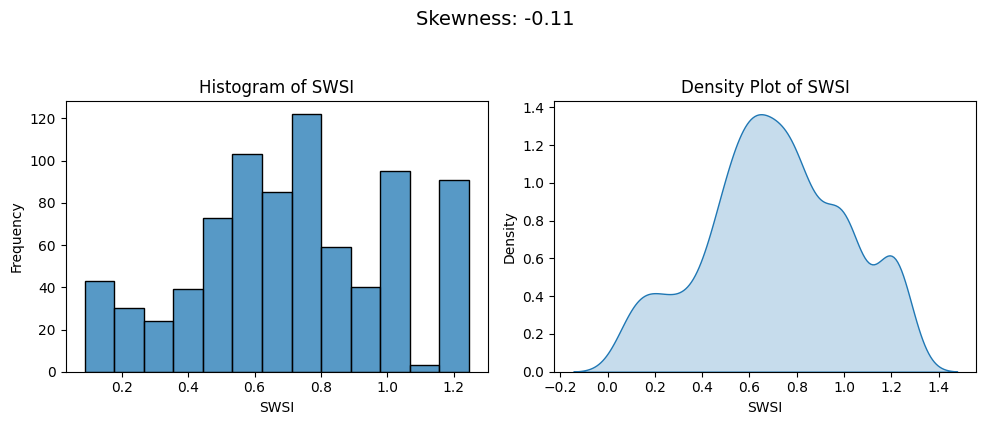

c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bnsoh2\AppData\Local\Temp\ipykernel_27816\661199368.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


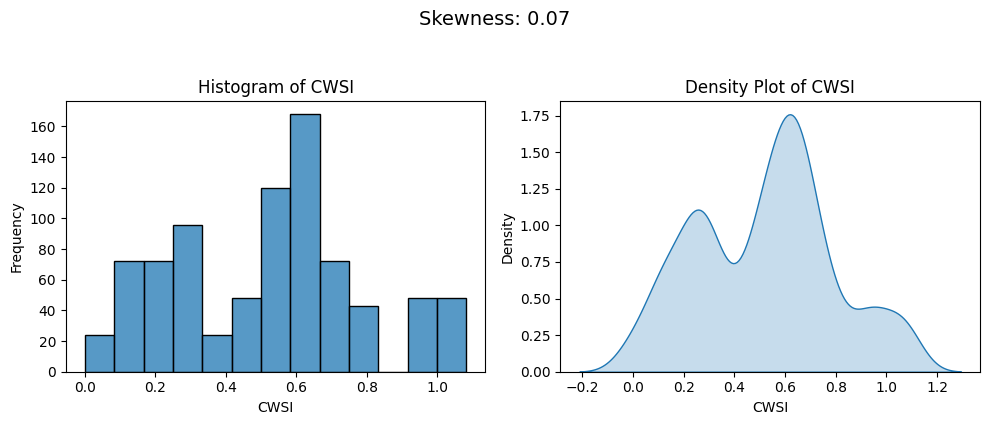

c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bnsoh2\AppData\Local\Temp\ipykernel_27816\661199368.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


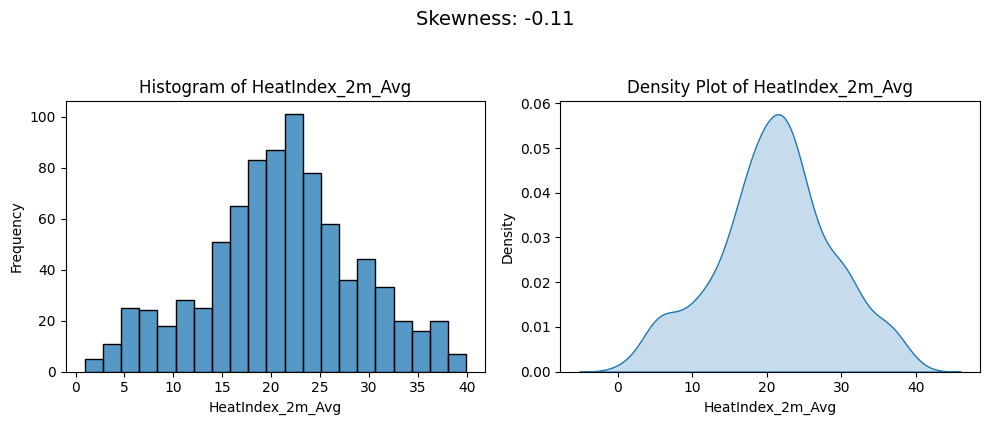

c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bnsoh2\AppData\Local\Temp\ipykernel_27816\661199368.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)
c:\Users\bnsoh2\Desktop\venvs\ml_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


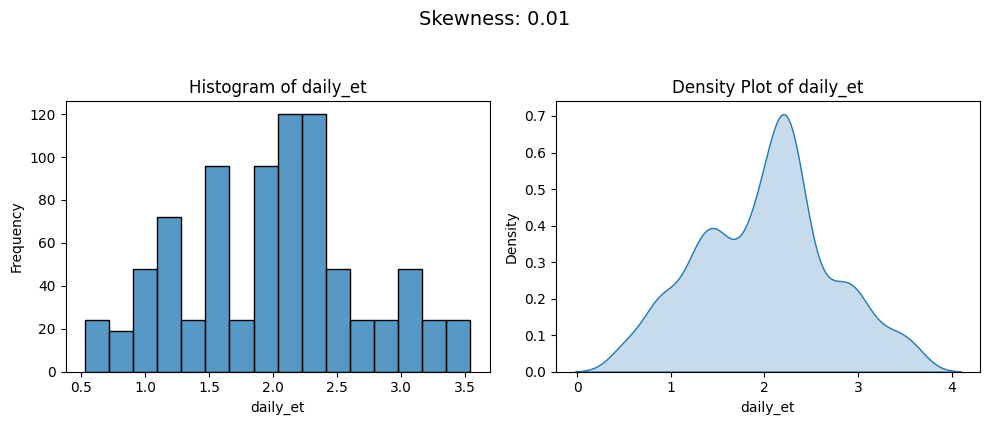

In [23]:
# List of selected columns to analyze
selected_columns = ['canopy_temp', 'SWSI', 'CWSI', 'HeatIndex_2m_Avg', 'daily_et']

# Histogram and Density Plot for each selected column
for column in selected_columns:
    if column in df.columns:
        plt.figure(figsize=(10, 4))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=False)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        
        # Density Plot
        plt.subplot(1, 2, 2)
        sns.kdeplot(df[column], shade=True)
        plt.title(f'Density Plot of {column}')
        plt.xlabel(column)
        
        # Display skewness
        skewness = df[column].skew()
        plt.suptitle(f'Skewness: {skewness:.2f}', fontsize=14, y=1.05)
        
        plt.tight_layout()
        plt.show()
    else:
        print(f'Column {column} not found in DataFrame.')

## Simple Linear Regression with Time Lags

For each combination of output and input variable, we fit a simple linear regression model incorporating the identified optimal time lags.


In [9]:
# Example for one output variable and one input variable with identified lag
output_var = 'CWSI'
input_var = 'Ta_2m_Avg'
lag = 5  # Example lag

X = df[input_var].shift(lag).dropna()
y = df[output_var][lag:]

model = LinearRegression().fit(X.values.reshape(-1, 1), y)
print(f'Coefficient: {model.coef_[0]}, Intercept: {model.intercept_}')


Coefficient: 0.022007217102125644, Intercept: 1.4233306552370193


# Example for one output variable and one input variable with identified lag
output_var = 'CWSI'
input_var = 'Ta_2m_Avg'
lag = 5  # Example lag

X = df[input_var].shift(lag).dropna()
y = df[output_var][lag:]

model = LinearRegression().fit(X.values.reshape(-1, 1), y)
print(f'Coefficient: {model.coef_[0]}, Intercept: {model.intercept_}')


In [10]:
for output_var in output_vars:
    print(f'{output_var} - Variance: {df[output_var].var()}, Standard Deviation: {df[output_var].std()}')

# Example residuals calculation for one model
predictions = model.predict(X.values.reshape(-1, 1))
residuals = y - predictions
print(f'Residuals - Standard Deviation: {residuals.std()}')


CWSI - Variance: 2.2831485828164437, Standard Deviation: 1.5110091273107664
SWSI - Variance: 0.18913194998480717, Standard Deviation: 0.4348930328078471
HeatIndex_2m_Avg - Variance: 49.8243469800026, Standard Deviation: 7.058636339974075
daily_et - Variance: 1.7238061908896964, Standard Deviation: 1.312937999636577
Residuals - Standard Deviation: 1.5042628031565228
